# Stable Diffusion 🎨

Stable Diffusion is a text-to-image latent diffusion model created by the researchers and engineers from [CompVis](https://github.com/CompVis), [Stability AI](https://stability.ai/), and [LAION](https://laion.ai/). It's trained on 512x512 images from a subset of the [LAION-5B](https://laion.ai/blog/laion-5b/) database. This model uses a frozen CLIP ViT-L/14 text encoder to condition the model on text prompts. With its 860M UNet and 123M text encoder, the model is relatively lightweight and runs on a GPU with at least 10GB VRAM.

## Getting Started

Install this notebook's requirements and download the pre-trained model from Hugging Face.

In [1]:
%pip install --upgrade git+https://github.com/huggingface/diffusers.git transformers accelerate scipy

  Cloning https://github.com/huggingface/diffusers.git to /tmp/pip-req-build-qrt62hkq
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/diffusers.git /tmp/pip-req-build-qrt62hkq
  Resolved https://github.com/huggingface/diffusers.git to commit 69de9b2eaa3a9047e0074b49753eb7a71aec4a5d
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 63.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 191.5/191.5 kB 12.4 MB/s eta 0:00:00
  Created wheel for diffusers: filename=diffusers-0.10.2-py3-none-any.whl size=503073 sha256=5d754dfb71622483b37658ea3e2e464bd4a01103922020e6929c234b7d79e2ba
  Stored in directory: /tmp/pip-ephem-wheel-cache-e60fkm0s/wheels/4d/b7/a8/6f9549ceec5daad78675b857ac57d697c387062506520a7b50
Successfully built diffusers
  Attempting uninstall: transformers
    Found existing inst

In [2]:
from huggingface_hub import HfFolder
from os import environ

token = environ.get("HUGGING_FACE_TOKEN")
HfFolder.save_token(token)

In [6]:
import torch
from diffusers import StableDiffusionPipeline, EulerDiscreteScheduler

model_id = "stabilityai/stable-diffusion-2"

# Use the Euler scheduler here instead
scheduler = EulerDiscreteScheduler.from_pretrained(model_id, subfolder="scheduler")
pipe = StableDiffusionPipeline.from_pretrained(model_id, scheduler=scheduler, revision="fp16", torch_dtype=torch.float16)
device = "cuda"
pipe = pipe.to(device)

Fetching 12 files:   0%|          | 0/12 [00:00<?, ?it/s]

## Create New Art

Update `prompt` and run the following cells to create art!

In [10]:
prompt = "a small dog cooking pasta in a kitchen"

  0%|          | 0/50 [00:00<?, ?it/s]

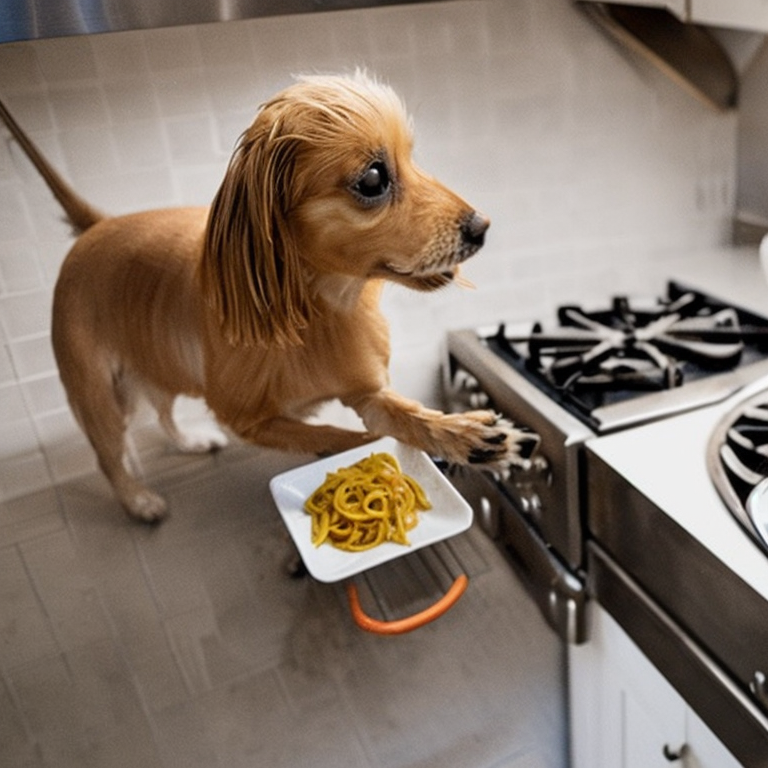

In [12]:
from torch import autocast

with autocast(device):
  image = pipe(prompt, height=768, width=768).images[0]
image